In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import wald_gaussian as xmpl
from wald_train import *
from wald_plots import *
from wald_groundtruth import *

/Users/lukasheinrich/Code/learning_profile_liklihoods/_venv/lib/python3.7/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/lukasheinrich/Code/learning_profile_liklihoods/_venv/lib/python3.7/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/lukasheinrich/Code/learning_profile_liklihoods/_venv/lib/python3.7/site-packages/torch/serialization.py:786: SourceChangeWarning: source code 

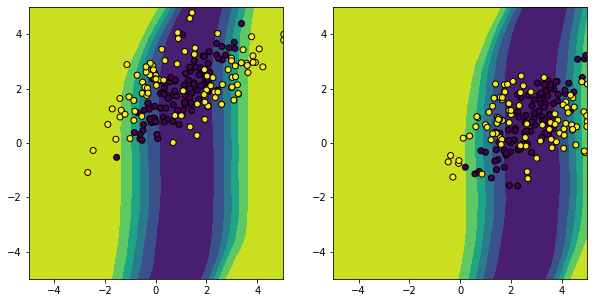

In [2]:
model = torch.load('wald_gauss.ckpt')
plot_trained_model(xmpl, model,1.2,2.8)

In [3]:
calib_funcs = calibrate_model(xmpl, model, null = [0.2,0.3], alt = [1.7,-0.2])
auto_rescale = auto_rescale_func(xmpl, model, null = [0.2,0.3], alt = [1.7,-0.2])

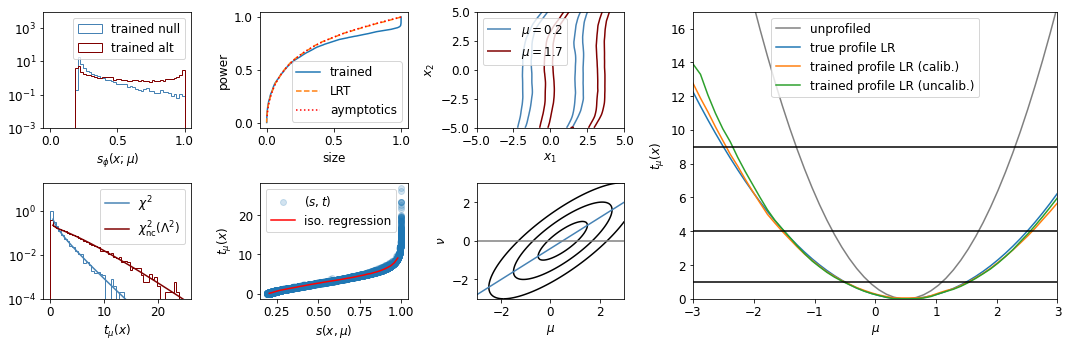

In [4]:
import matplotlib
font = {'size': 12}

matplotlib.rc('font', **font)

compare_roc_curves_to_asymptotics(xmpl, model, calib_funcs, auto_rescale, null = [0.2,0.3], alt = [1.7,-0.4], obs_data = xmpl.expcted_data([0.5,0.0]))
plt.gcf().set_tight_layout(True)
plt.savefig('gauss_fig.pdf')
plt.savefig('gauss_fig.png')